In [11]:
import numpy as np
import matplotlib.pyplot as plt
# import math
plt.style.use("dark_background")

In [12]:
# start from the mid of two of the dots. call it current position
# for loop
#     choose a dot at random
#     find mid of the chosen dot and the current position
#     add mid to the list of points
#     current mid = new mid

In [13]:
L = 1  # Length of side of the pentagon
starting_angle = np.pi/2
num_vertices = 5
vertices = np.zeros((num_vertices, 2))  # x and y position of the vertices
vertices[0] = np.array([0, L])
for i in range(1, num_vertices):
    angle = starting_angle + i * (2*np.pi/num_vertices)
    vertices[i] = np.array([L*np.cos(angle), L*np.sin(angle)])

In [14]:
pos = (vertices[0] + vertices[1]) / 2
repeats = 10000
points = np.zeros((repeats, 2))
for i in range(repeats):
    j = np.random.randint(low=0, high=num_vertices)
    pos = np.array([(pos[0] + vertices[j, 0]) / 2, (pos[1] + vertices[j, 1]) / 2])
    points[i] = pos

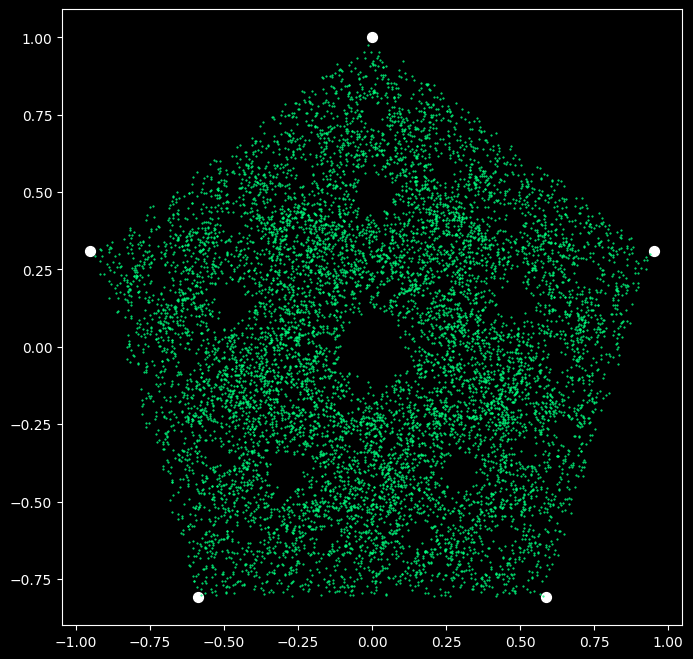

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(vertices[:, 0], vertices[:, 1], s=50, color="w")
plt.scatter(points[:, 0], points[:, 1], marker=".", s=1, color="springgreen");

Bonus:

Now that we have a shape embedded in the data, let's "hide" it in a larger dimension, and then find it again by applying PCA.

Essentially, I add 48 more dimensions to have a 50-dimensional data. The first two columns of the matrix "array" below correspond to the original two-dimensional data with the pentagon fractal. Then I shuffle the columns of the resultant 10000x50 matrix, so the dimension vectors are randomly distributed. Then by looking at the data using the first two dimesnions, chances are, we are looking at random data! After that, we apply PCA to find the "right" direction of looking at the data and redeem the fractal.

In [16]:
array = np.hstack((points, np.random.rand(10000, 48)))
shuffled = array[:, np.random.permutation(array.shape[1])]

variances along the original 50 dimensions: [0.08204835 0.08194525 0.08329031 0.08324719 0.08391698 0.08431867
 0.08351724 0.08236858 0.08310441 0.08318372 0.08401063 0.16890491
 0.08385383 0.08341619 0.08361563 0.0830779  0.08178122 0.08407421
 0.08343932 0.08275696 0.08477344 0.08312518 0.16294599 0.08302294
 0.08295682 0.08444279 0.08323281 0.08337325 0.08410919 0.08326929
 0.08289474 0.08364381 0.08332231 0.08361687 0.08372437 0.08296759
 0.08254267 0.08282241 0.08343411 0.08270485 0.0837084  0.08434488
 0.08360853 0.08312236 0.08330155 0.08341108 0.08325847 0.08300991
 0.08346333 0.08529749]
variances along the first 3 PCA dimensions: [0.16967917 0.16383411 0.09476513]


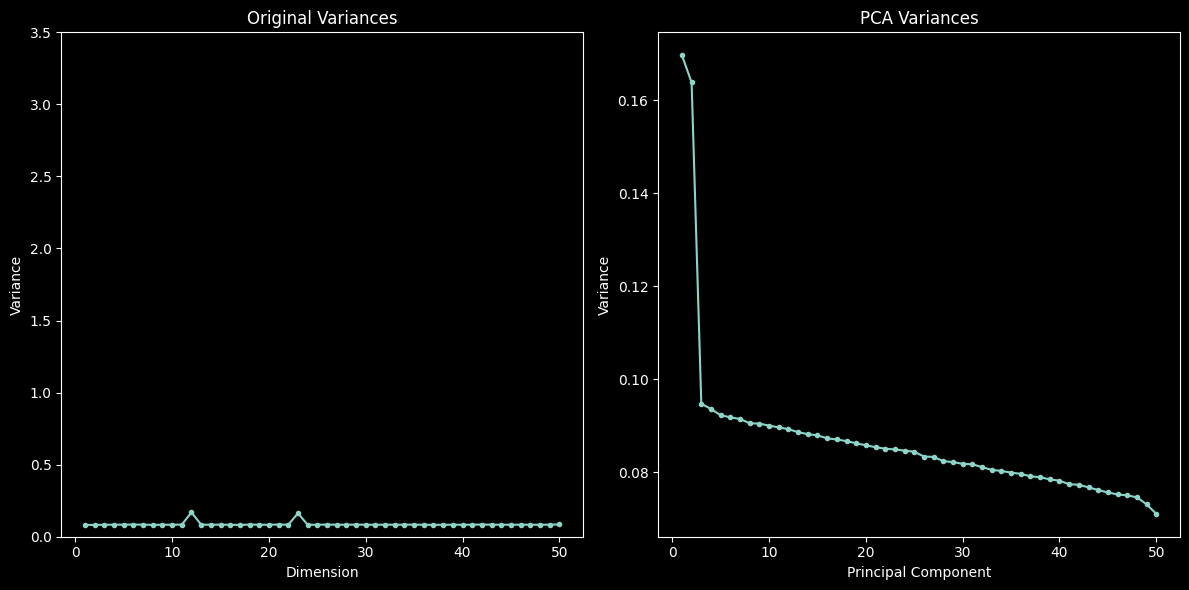

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(shuffled)
transformed_data = pca.transform(shuffled)

original_variances = np.var(shuffled, axis=0)
# compare variances:
print(f"variances along the original 50 dimensions: {original_variances}")
print(f"variances along the first 3 PCA dimensions: {pca.explained_variance_[:3]}")


# Plot:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(range(1, 51), original_variances, ".-")
ax1.set_title("Original Variances")
ax1.set_xlabel("Dimension")
ax1.set_ylabel("Variance")
ax1.set_yticks(np.arange(0, 4, 0.5))

ax2.plot(range(1, 51), pca.explained_variance_, ".-")
ax2.set_title("PCA Variances")
ax2.set_xlabel("Principal Component")
ax2.set_ylabel("Variance")

fig.tight_layout();

In [19]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
# Original first axis:
e1 = np.zeros(50)
e1[0] = 1
# Angles in degrees:
angle_pcs = np.arccos(np.dot(pc1, pc2) / (np.linalg.norm(pc1) * np.linalg.norm(pc2))) * 180 / np.pi
angle_e1_pc1 = np.arccos(np.dot(e1, pc1) / (np.linalg.norm(e1) * np.linalg.norm(pc1))) * 180 / np.pi
angle_e1_pc2 = np.arccos(np.dot(e1, pc2) / (np.linalg.norm(e1) * np.linalg.norm(pc2))) * 180 / np.pi
print(f"Angle between the two principla components: {angle_pcs} degrees")
print(f"Angle between e1 and pc1: {angle_e1_pc1} degrees")
print(f"Angle between e1 and pc2: {angle_e1_pc2} degrees")

Angle between the two principla components: 90.00000000000001 degrees
Angle between e1 and pc1: 90.04071963747067 degrees
Angle between e1 and pc2: 91.170243003646 degrees


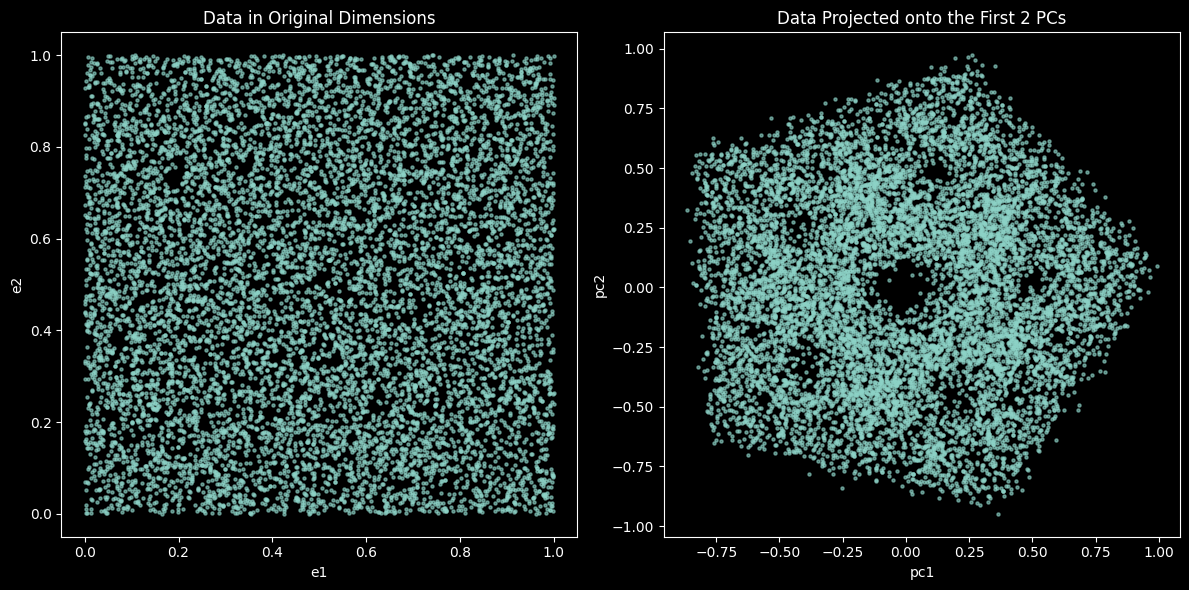

In [20]:
# Plot:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(shuffled[:, 0], shuffled[:, 1], marker=".", alpha=0.6, s=20)
ax1.set_title("Data in Original Dimensions")
ax1.set_xlabel("e1")
ax1.set_ylabel("e2")
# ax1.set_yticks(np.arange(0, 4, 0.5))

ax2.scatter(transformed_data[:, 0], transformed_data[:, 1], marker=".", alpha=0.6, s=20)
ax2.set_title("Data Projected onto the First 2 PCs")
ax2.set_xlabel("pc1")
ax2.set_ylabel("pc2")

fig.tight_layout();